In [1]:
import torch
from cpclasses import *

In [2]:
data_flat = np.loadtxt('labeled_clusters_1000.txt')
positions_from_file = data_flat[:,:24].reshape(-1,12,2)
energies_from_file = data_flat[:,24:25].reshape(-1)
labels_from_file = data_flat[:,-1:].reshape(-1).astype('int')

In [5]:
positions_from_file[:1],energies_from_file[:1],labels_from_file[:1]

(array([[[4.721805, 4.275757],
         [4.99196 , 2.669204],
         [4.631578, 5.889142],
         [4.373125, 7.554287],
         [5.004835, 6.797513],
         [5.602687, 6.016059],
         [6.18045 , 5.206921],
         [5.71127 , 4.300034],
         [5.206776, 5.119051],
         [6.353148, 3.567599],
         [4.010138, 6.635914],
         [3.676022, 5.698195]]]),
 array([-27.092445]),
 array([5]))

In [7]:
for label in np.unique(labels_from_file):
    print(label, len(labels_from_file[labels_from_file==label]))


0 48
1 69
2 127
3 123
4 158
5 108
6 103
7 79
8 59
9 126


[Text(0.5, 0, 'Energy'),
 Text(0, 0.5, 'Abundance'),
 Text(0.5, 1.0, 'Energy distribution of clusters')]

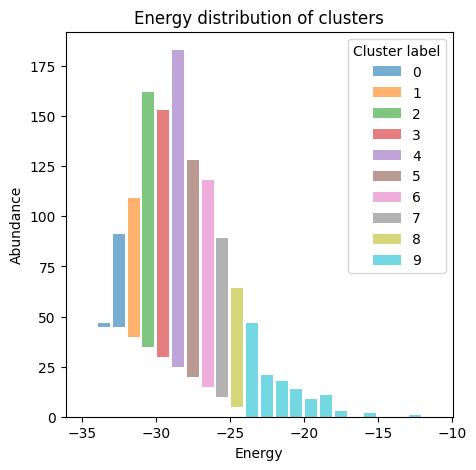

In [18]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

bins = range(35)

for label in np.unique(labels_from_file):
    bins = range(-35,-10)
    bars, _ = np.histogram(energies_from_file[labels_from_file==label],bins=bins)
    bottom = (9-label)*5
    ax.bar(np.array(list(bins))[:-1]+0.5,bars,bottom=bottom,alpha=0.6,label=f'{label}')

ax.legend(title='Cluster label')
ax.set(xlabel='Energy',ylabel='Abundance', title='Energy distribution of clusters')



In [ ]:
class LJGSystem():

    def __init__(self,positions,energies,labels):
        self.positions = torch.tensor(positions,dtype=torch.float32)
        self.energies = torch.tensor(energies,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.int32)


    def moments(self):
        beta = 3    
        cm = torch.mean(self.positions, dim=0)
        mu2 = beta**(-1) * torch.sum(((self.positions - cm)**2))
        mu4 = beta**(-2) * torch.sum(((self.positions - cm)**2)**2)
        mu6 = beta**(-3) * torch.sum(((self.positions - cm)**2)**3)
        mu8 = beta**(-4) * torch.sum(((self.positions - cm)**2)**4)
        

        return cm, mu2, mu4, mu6, mu8

In [72]:
i = 0

print(energies_from_file[i])
print(labels_from_file[i])
ljg = LJGSystem(positions_from_file[i],energies_from_file[i],labels_from_file[i])

print(ljg.moments())

-27.092445
5
(tensor([5.0386, 5.3108]), tensor(9.8654), tensor(11.5107), tensor(19.6001), tensor(38.9996))


In [89]:
positions = torch.tensor(positions_from_file[i])

beta = 3
cm = torch.mean(positions, dim=0)
print(cm)

mu2 = beta**(-1) * torch.sum(((positions - cm)**2))
print(mu2)

mu4 = torch.sum(torch.sum((positions - cm)**2, dim=1)**2)
print(mu4)



tensor([5.0386, 5.3108], dtype=torch.float64)
tensor(9.8654, dtype=torch.float64)
tensor(124.4612, dtype=torch.float64)
